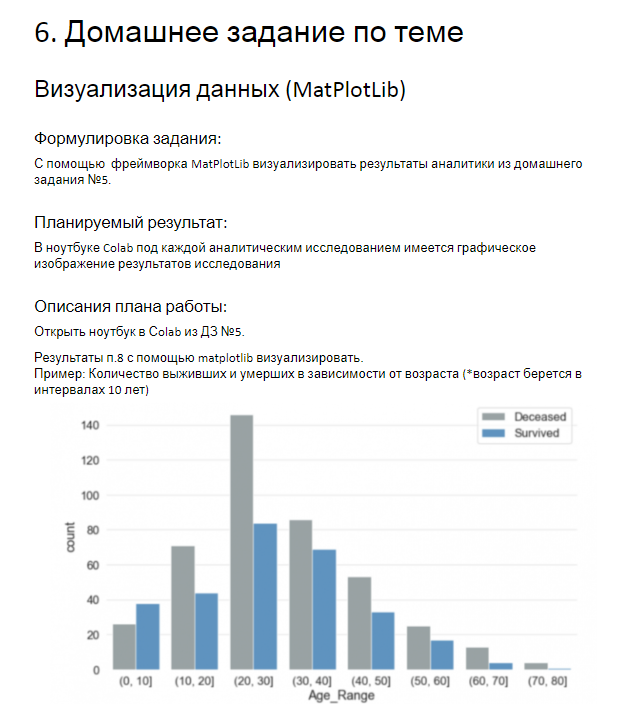

In [1]:
# Сохранить из google colab или в google colab
from google.colab import files, drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#Data Frame
df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv', sep=',')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
rows, cols = df.shape
print(f"В датасете {rows} строк")
print(f"В датасете {cols} столбцов")

В датасете 891 строк
В датасете 12 столбцов


<Axes: >

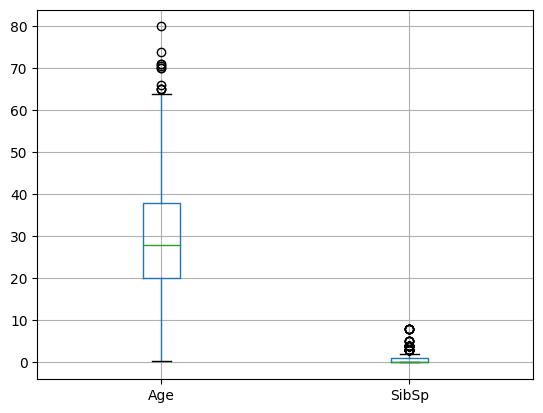

In [13]:
df[['Age', 'SibSp']].boxplot()

In [ ]:
# NULL во всём dataframe
df.isnull().sum().sum ()

0

In [ ]:
# NULL в каждом столбце
df.isnull().sum ()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
df = df.dropna()

isSurvived = df['Survived'] == 1
#print(isSurvived)
isDied = df['Survived'] == 0
# print(isDied)
dataset_survived = df.loc[isSurvived]
dataset_died = df.loc[isDied]
# print(dataset_died)

Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
dtype: object

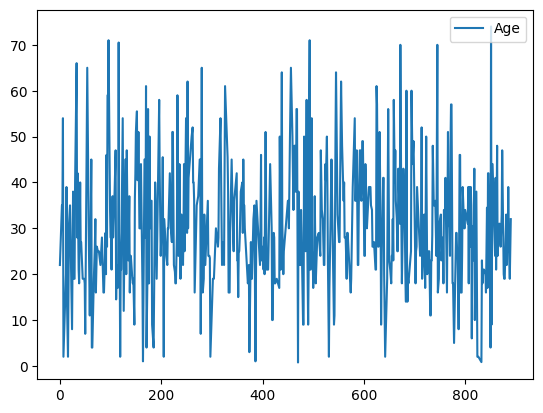

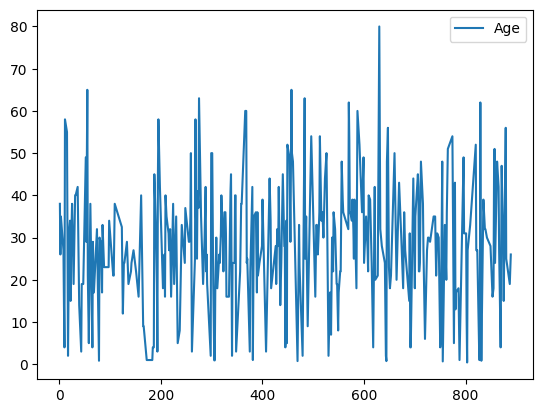

In [ ]:
df.groupby('Survived')[['Age', 'Ticket']].plot()

In [25]:
def show_plot(data, x_points, color):
    plt.hist(data, x_points, color)
    plt.show()

10.0


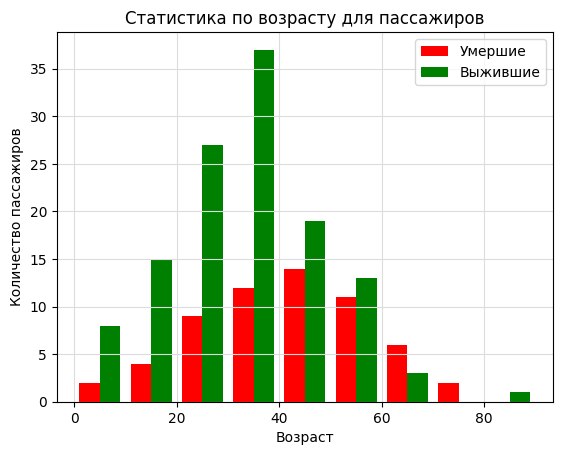

In [26]:
data_to_plot_age = [dataset_died['Age'], dataset_survived['Age']]
x_points, step = np.linspace(0, 90, 10, retstep=True)
print (step)
plt.hist(data_to_plot_age, x_points, color = ['red', 'green'], label=['Умершие', 'Выжившие'])
plt.legend(loc='upper right')
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по возрасту для пассажиров")
plt.grid(color="gainsboro")
plt.show()

In [23]:
# распределение по возрасту
age_median = df['Age'].median()
age_mean = df['Age'].mean()
age_mode = df['Age'].mode()[0]
print(f"Медиана {age_median}")
print(f"Ср. знач {age_mean}")
print(f"Мода {age_mode}")

Медиана 36.0
Ср. знач 35.6744262295082
Мода 36.0


In [ ]:
df['Age'] = df['Age'].fillna(method='ffill')
df['Embarked'] = df['Embarked'].fillna(method='ffill')

In [ ]:
df['Cabin'] = df['Cabin'].fillna(method='ffill')
df['Cabin'] = df['Cabin'].fillna(0)

In [ ]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
# Количество уникальных значений
df.nunique ()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

In [ ]:
#Получим максимальные значения в каждом столбце
maximum = df.max()
print(maximum)

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
Embarked                                 S
dtype: object


<ipython-input-104-47f14c1bd9e3>:2: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  maximum = df.max()


In [ ]:
#Получим минимальные значения в каждом столбце
minimum = df.min()
print(minimum)

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
Embarked                         C
dtype: object


<ipython-input-105-191db6e7f54a>:2: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  minimum = df.min()
